# Assessing Data
- number of samples in each dataset
- number of columns in each dataset
- duplicate rows in each dataset
- datatypes of columns
- features with missing values
- number of non-null unique values for features in each dataset
- what those unique values are and counts for each

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
%matplotlib inline

In [2]:
alpha_08 = pd.read_csv('all_alpha_08.csv')
alpha_18 = pd.read_csv('all_alpha_18.csv')
print(alpha_08.shape, alpha_18.shape)

(2404, 18) (1611, 18)


In [3]:
print(sum(alpha_08.duplicated()), sum(alpha_18.duplicated()))

25 0


In [4]:
print(alpha_08.isnull().any(axis=1).sum(), alpha_18.isnull().any(axis=1).sum())

199 2


In [5]:
alpha_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [6]:
alpha_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

# Cleaning Label Columns

In [7]:
alpha_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)
alpha_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

print(alpha_08.shape[1], alpha_08.shape[1])

14 14


In [8]:
alpha_08.rename(columns={'Sales Area':'Cert Region'}, inplace=True)

In [9]:
alpha_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
alpha_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [10]:
# sanity check
(alpha_08.columns == alpha_18.columns).all()

True

# Filter, Drop Nulls, Dedupe

In [11]:
print(alpha_08.shape, alpha_18.shape)

(2404, 14) (1611, 14)


In [12]:
alpha_08.query('cert_region == "CA"', inplace=True)
alpha_18.query('cert_region == "CA"', inplace=True)

print(alpha_08.shape, alpha_18.shape)

# sanity check
print(alpha_08['cert_region'].nunique(), alpha_18['cert_region'].nunique())

(1084, 14) (798, 14)
1 1


In [13]:
alpha_08.dropna(inplace=True)
alpha_18.dropna(inplace=True)

print(alpha_08.shape, alpha_18.shape)

# check
print(alpha_08.isnull().sum().any(), alpha_08.isnull().sum().any())

(1009, 14) (797, 14)
False False


In [14]:
print(sum(alpha_08.duplicated()), sum(alpha_18.duplicated()))

23 3


In [15]:
alpha_08.drop_duplicates(inplace=True)
alpha_18.drop_duplicates(inplace=True)
print(sum(alpha_08.duplicated()), sum(alpha_18.duplicated()))

0 0


# Inspecting Data Types
- For the 'cyl' column, we should: 
    - Extract int values from the strings in the 2008 cyl column.
    - Convert float to ints in the 2018 cyl column.
- Convert the 'air_pollution_score' column from both datasets to float.
- Convert all the mpg from both datasets to float.
- Convert the 'greenhouse_gas_score' to ints.


In [16]:
alpha_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   cert_region           986 non-null    object 
 7   veh_class             986 non-null    object 
 8   air_pollution_score   986 non-null    object 
 9   city_mpg              986 non-null    object 
 10  hwy_mpg               986 non-null    object 
 11  cmb_mpg               986 non-null    object 
 12  greenhouse_gas_score  986 non-null    object 
 13  smartway              986 non-null    object 
dtypes: float64(1), object(13)
memory usage: 115.5+ KB


In [17]:
alpha_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 794 non-null    object 
 1   displ                 794 non-null    float64
 2   cyl                   794 non-null    float64
 3   trans                 794 non-null    object 
 4   drive                 794 non-null    object 
 5   fuel                  794 non-null    object 
 6   cert_region           794 non-null    object 
 7   veh_class             794 non-null    object 
 8   air_pollution_score   794 non-null    int64  
 9   city_mpg              794 non-null    object 
 10  hwy_mpg               794 non-null    object 
 11  cmb_mpg               794 non-null    object 
 12  greenhouse_gas_score  794 non-null    int64  
 13  smartway              794 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 93.0+ KB


# Fixing Data Types

## Step 1

In [18]:
alpha_08['cyl'].value_counts()

# using regular expressions to extract ints out of numbers by '\d+'
alpha_08['cyl'] = alpha_08['cyl'].str.extract('(\d+)').astype(int)

In [19]:
alpha_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [20]:
alpha_18['cyl'] = alpha_18['cyl'].astype(int)

## Step 2

In [21]:
# alpha_08['air_pollution_score'].astype(int)
alpha_08[alpha_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


### It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh... so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [22]:
hb_08 = alpha_08[alpha_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


In [23]:
hb_18 = alpha_18[alpha_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,CA,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,CA,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,CA,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,CA,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,CA,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,CA,standard SUV,3,11/16,15/22,12/18,3,No


In [24]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


In [25]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [26]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,CA,small car,6,13,19,15,7,no


In [27]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,CA,small car,4,18,25,21,6,no


In [28]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,CA,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,CA,small car,4,18,25,21,6,no


In [29]:
# drop the original hybrid rows
alpha_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
alpha_08 = alpha_08.append(new_rows, ignore_index=True)

In [30]:
alpha_08[alpha_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [31]:
alpha_08.shape

(987, 14)

### Repeat for 18 dataset

In [32]:
hb_18 = alpha_18[alpha_18['fuel'].str.contains('/')]
hb_18.head(3)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite


In [33]:
df11 = hb_18.copy()
df12 = hb_18.copy()

In [34]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for i in split_columns:
    df11[i] = df11[i].apply(lambda x: x.split("/")[0])
    df12[i] = df12[i].apply(lambda x: x.split("/")[1])

In [35]:
df11.head(3)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,CA,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,CA,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,CA,small car,7,27,31,28,10,Elite


In [36]:
alpha_18.drop(hb_18.index, inplace=True)

In [37]:
new_rows = df11.append(df12)
alpha_18 = alpha_18.append(new_rows, ignore_index=True)

In [38]:
alpha_18[alpha_18['fuel'].str.contains("/")]

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [39]:
alpha_08['air_pollution_score'] = alpha_08['air_pollution_score'].astype(float)
alpha_18['air_pollution_score'] = alpha_18['air_pollution_score'].astype(float)

## Step 3

In [40]:
columns_to_change = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for i in columns_to_change:
    alpha_08[i] = alpha_08[i].astype(float)
    alpha_18[i] = alpha_18[i].astype(float)

In [41]:
alpha_08['greenhouse_gas_score'] = alpha_08['greenhouse_gas_score'].astype(int)
alpha_18['greenhouse_gas_score'] = alpha_18['greenhouse_gas_score'].astype(int)

In [42]:
# sanity check
alpha_08.dtypes == alpha_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
cert_region             True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

# Exploring with Visuals

### Compare the distributions of greenhouse gas score in 2008 and 2018.

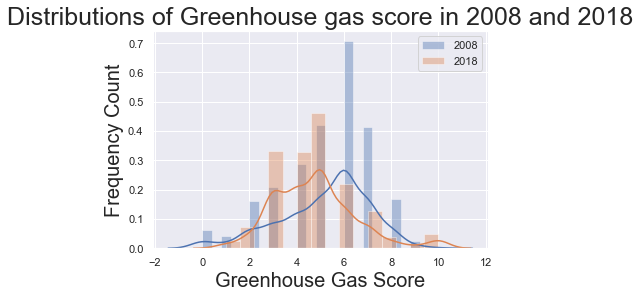

In [43]:
sns.distplot(alpha_08['greenhouse_gas_score'], norm_hist=True, label='2008')
sns.distplot(alpha_18['greenhouse_gas_score'], norm_hist=True, label='2018')
plt.ylabel('Frequency Count', fontsize=20)
plt.xlabel('Greenhouse Gas Score', fontsize=20)
plt.title('Distributions of Greenhouse gas score in 2008 and 2018', fontsize=25)

plt.legend()
plt.show()
# sns.set(rc={'figure.figsize':(12,8)})

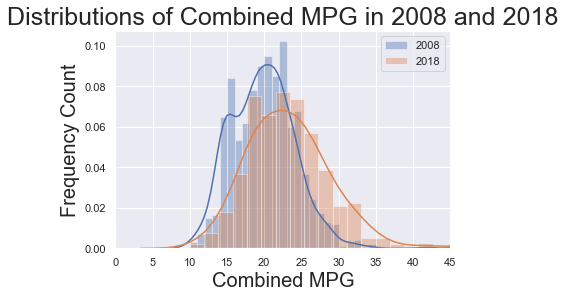

In [44]:
sns.distplot(alpha_08['cmb_mpg'], norm_hist=True, label='2008')
sns.distplot(alpha_18['cmb_mpg'], norm_hist=True, label='2018')
plt.ylabel('Frequency Count', fontsize=20)
plt.xlabel('Combined MPG', fontsize=20)
plt.title('Distributions of Combined MPG in 2008 and 2018', fontsize=25)
plt.legend()
plt.xlim(0, 45)
plt.show()

/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:1651: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


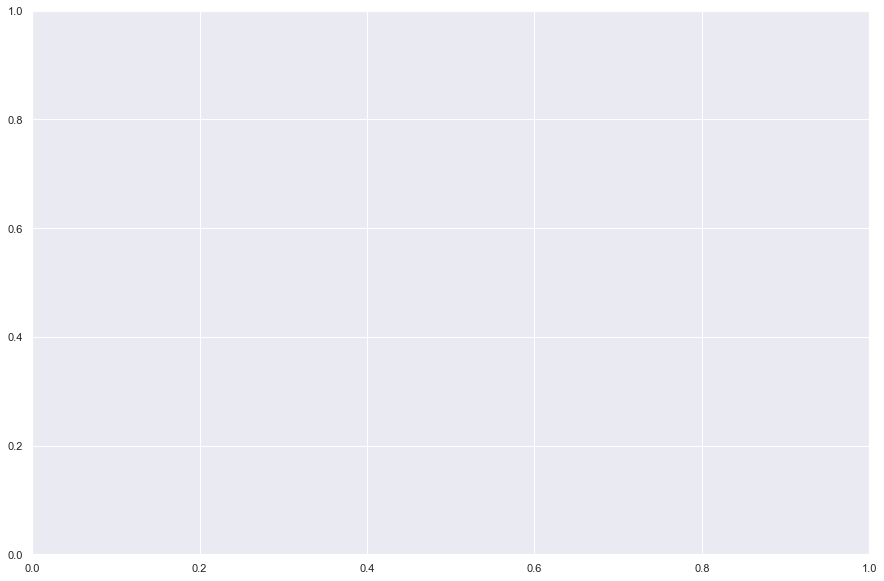

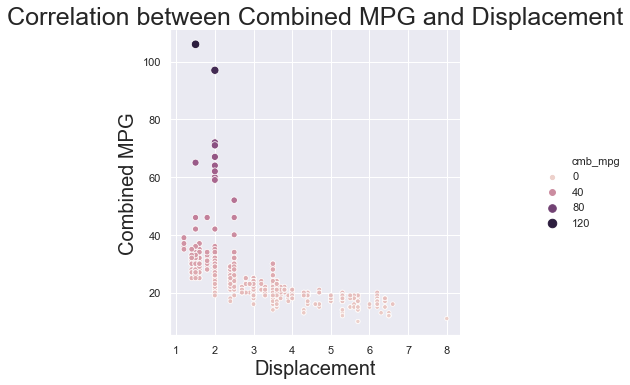

In [45]:
# for 2008

fig, ax = plt.subplots(figsize = (15,10))

sns.relplot(x='displ', 
            y='cmb_mpg',
            data=alpha_18,
            kind='scatter',
            size='cmb_mpg',
            hue='cmb_mpg',
            ax = ax)
            
plt.xlabel('Displacement', fontsize=20)
plt.ylabel('Combined MPG', fontsize=20)
plt.title('Correlation between Combined MPG and Displacement', fontsize=25)
# sns.set(rc={'figure.figsize':(12,8)})
plt.show()

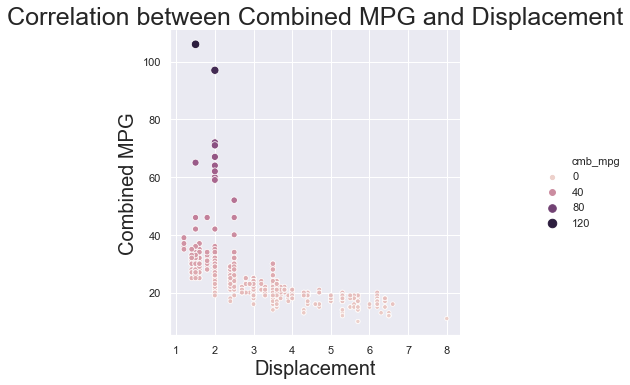

In [46]:
# for 2018
sns.relplot(x='displ', 
            y='cmb_mpg',
            data=alpha_18,
            kind='scatter',
            size='cmb_mpg',
            hue='cmb_mpg')

plt.xlabel('Displacement', fontsize=20)
plt.ylabel('Combined MPG', fontsize=20)
plt.title('Correlation between Combined MPG and Displacement', fontsize=25)
# sns.set(rc={'figure.figsize':(12,8)})
plt.show()

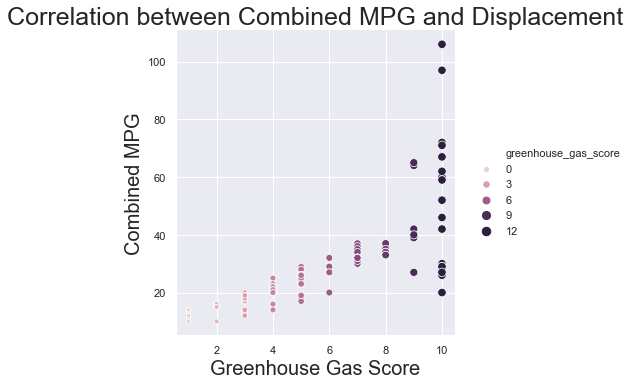

In [47]:
# for 2018
sns.relplot(x='greenhouse_gas_score', 
            y='cmb_mpg',
            data=alpha_18,
            kind='scatter',
            size='greenhouse_gas_score',
            hue='greenhouse_gas_score')

plt.xlabel('Greenhouse Gas Score', fontsize=20)
plt.ylabel('Combined MPG', fontsize=20)
plt.title('Correlation between Combined MPG and Displacement', fontsize=25)
plt.show()

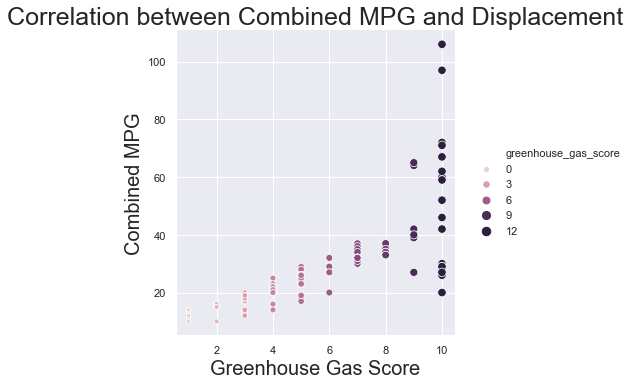

In [48]:
# for 2018
sns.relplot(x='greenhouse_gas_score', 
            y='cmb_mpg',
            data=alpha_18,
            kind='scatter',
            size='greenhouse_gas_score',
            hue='greenhouse_gas_score')

plt.xlabel('Greenhouse Gas Score', fontsize=20)
plt.ylabel('Combined MPG', fontsize=20)
plt.title('Correlation between Combined MPG and Displacement', fontsize=25)
# sns.set(rc={'figure.figsize':(12,8)})
plt.show()

# Conclusions & Visuals
Draw conclusions and create visuals to communicate results in the Jupyter notebook below! Make sure to address the following questions.


###  Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [49]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [50]:
fuel_08 = df_08['fuel'].value_counts()
fuel_08

Gasoline    984
gas           1
CNG           1
ethanol       1
Name: fuel, dtype: int64

In [51]:
fuel_18 = df_18['fuel'].value_counts()
fuel_18

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

We can clearly see that comparing to 2008, less vehicles are running on gasoline and more vehicles are running on more eco-friendly fuel types.

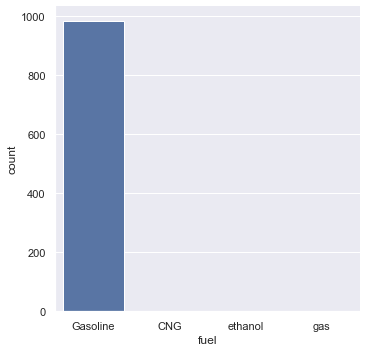

In [52]:
sns.catplot('fuel', data=df_08, kind='count')

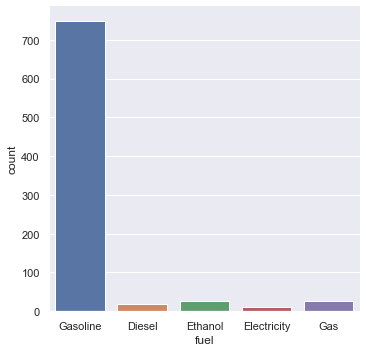

In [53]:
sns.catplot('fuel', data=df_18, kind='count')

### How much have vehicle classes improved in fuel economy (increased in mpg)?

In [54]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [55]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

Text(0, 0.5, 'Increase in Average Combined MPG')

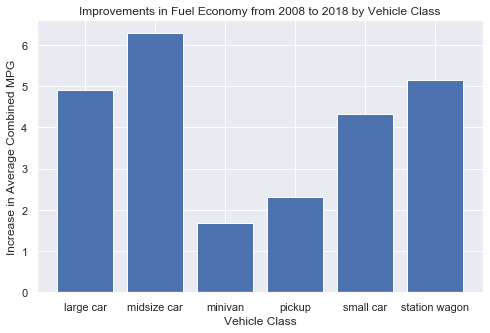

In [56]:
# how much they’ve increased by for each vehicle class\n”,
inc = veh_18 - veh_08
inc

# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG')

### What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

In [57]:
df_08['smartway'] = df_08['smartway'].str.replace('n','N')
df_08['smartway'] = df_08['smartway'].str.replace('y','Y')
df_08['smartway']

0       No
1       No
2       No
3      Yes
4      Yes
      ... 
982     No
983     No
984     No
985     No
986     No
Name: smartway, Length: 987, dtype: object

In [58]:
sw_08 = df_08.groupby('smartway').mean()
sw_08

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
No,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
Yes,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421


In [59]:
sw_18 = df_18.groupby('smartway').mean()
sw_18

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
Elite,1.970588,4.000000,7.000000,53.235294,53.117647,53.000000,10.000000
No,3.270304,5.720994,3.798343,19.325967,26.708564,22.041436,4.276243
Yes,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462


Text(0, 0.5, 'Increase in Combined MPG')

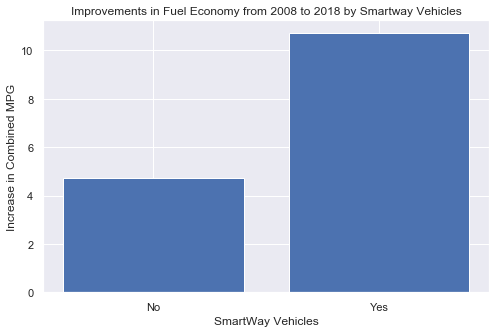

In [60]:
change_mpg = sw_18['cmb_mpg'] - sw_08['cmb_mpg']
change_mpg.dropna()
plt.subplots(figsize=(8, 5))
plt.bar(change_mpg.index, change_mpg)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Smartway Vehicles')
plt.xlabel('SmartWay Vehicles')
plt.ylabel('Increase in Combined MPG')

Text(0, 0.5, 'Increase in Greenhouse Gas Score')

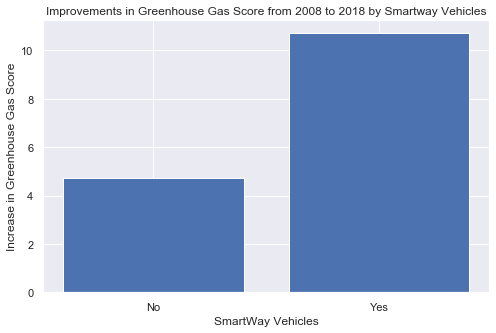

In [61]:
# change in greenhouse gas score
change_gh = sw_18['greenhouse_gas_score'] - sw_08['greenhouse_gas_score']
change_gh.dropna()
plt.subplots(figsize=(8, 5))
plt.bar(change_mpg.index, change_mpg)
plt.title('Improvements in Greenhouse Gas Score from 2008 to 2018 by Smartway Vehicles')
plt.xlabel('SmartWay Vehicles')
plt.ylabel('Increase in Greenhouse Gas Score')

### What features are associated with better fuel economy (mpg)?
Check this out for a tutorial on seaborn heatmap: https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

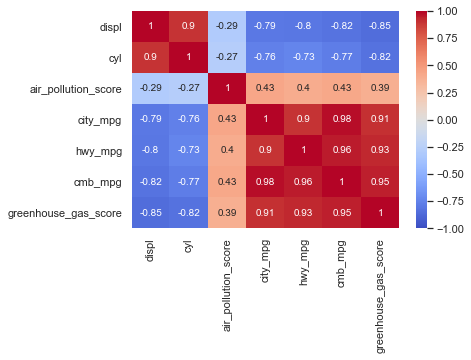

In [62]:
# Display the values, normalize the values and set them to 2 decimal 
sns.heatmap(df_08.corr(), annot=True, fmt='.2g', 
            vmin=-1, vmax=1, center=0, cmap='coolwarm'
           )

# Results with Merged Dataset

In [63]:
df_08.rename(columns=lambda x: x[:10] + '2008', inplace=True)
df_08.head(3)

,model2008,displ2008,cyl2008,trans2008,drive2008,fuel2008,veh_class2008,air_pollut2008,city_mpg2008,hwy_mpg2008,cmb_mpg2008,greenhouse2008,smartway2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,No
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,No


In [64]:
df_combined = df_08.merge(df_18, left_on='model2008', right_on='model', how='inner')

In [65]:
df_combined.head()

,model2008,displ2008,cyl2008,trans2008,drive2008,fuel2008,veh_class2008,air_pollut2008,city_mpg2008,hwy_mpg2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [66]:
model_mpg = df_combined.groupby('model')['cmb_mpg2008','cmb_mpg'].mean()

/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [67]:
model_mpg.head(3)

,cmb_mpg2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.5
AUDI A3,23.333333,28.0
AUDI A4,21.000000,27.0


In [68]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg2008']

In [69]:
model_mpg.head(3)

,cmb_mpg2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.5,3.500000
AUDI A3,23.333333,28.0,4.666667
AUDI A4,21.000000,27.0,6.000000


In [70]:
model_mpg.describe()
model_best_mpg = model_mpg.query('mpg_change >= 16.53')
model_best_mpg

,cmb_mpg2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333
